In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/amous/Desktop/finalData/voice_overall.csv')

In [2]:
for i in data.columns:
    print(i)

mdn
idnt_client_crm
idnt_compte_facturation
desc_profil
princp_data_vol_jour_secteur
princp_data_vol_jour_ville
princp_data_vol_soir_secteur
princp_data_vol_soir_ville
princp_data_vol_nuit_secteur
princp_data_vol_nuit_ville
princp_data_vol_total_octets
princp_data_vol_total_secteur
princp_data_vol_total_ville
princp_voix_dur_jour_secteur
princp_voix_dur_jour_ville
princp_voix_dur_soir_secteur
princp_voix_dur_soir_ville
princp_voix_dur_nuit_secteur
princp_voix_dur_nuit_ville
princp_voix_dur_total_minutes
princp_voix_dur_total_secteur
princp_voix_dur_total_ville
princp_actv_total_secteur
princp_actv_ville
princp_vol_actv


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 3: Prepare Data for Clustering
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])


# Exclude 'dn' column from clustering
columns_for_clustering = [col for col in data.columns if (col != 'mdn')]
X = data[columns_for_clustering].values


In [4]:
import os
import sys
import numpy as np


n_clusters = 3 

# Step 1: Change Directory to the parent directory of 'skmeans'
project_path = 'C:/Users/amous/kkconc'  # Replace with the path to the parent directory
os.chdir(project_path)

# Step 2: Import the SphericalKmeans class
from kkconc.clustering import spherical_kmeans

# Now you can use the SphericalKmeans class
spherical_kmeans_instance = spherical_kmeans.SphericalKmeans(n_clusters=n_clusters)


In [6]:

# Fit the model to your data (X)
spherical_kmeans_instance.fit(X)

# Access the cluster labels assigned to each data point after fitting
cluster_labels = spherical_kmeans_instance.labels_

# Access the criterion obtained from the best run (optional)
criterion = spherical_kmeans_instance.criterion

# Access the sequence of criterion values during the best run (optional)
criterions = spherical_kmeans_instance.criterions

 == New init == 
iteration: 0
29670.89716804056
iteration: 1
31530.851367086347
iteration: 2
31656.522603004254
iteration: 3
31681.62658966417
iteration: 4
31694.50588708066
iteration: 5
31701.84172070441
iteration: 6
31706.985467998114
iteration: 7
31710.540311317396
iteration: 8
31712.86775013617
iteration: 9
31714.574391006325
iteration: 10
31715.84783835601
iteration: 11
31716.927218145298
iteration: 12
31717.68891553722
iteration: 13
31718.220889473094
iteration: 14
31718.662517690645
iteration: 15
31719.081633308422
iteration: 16
31719.393936894317
iteration: 17
31719.57775510422
iteration: 18
31719.699201973075
iteration: 19
31719.777442490627


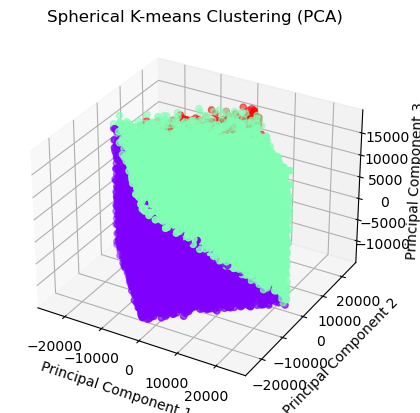

In [7]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



# Assuming 'X' is your data and 'labels_' are the cluster labels obtained from spherical k-means
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='rainbow')
ax.set_title('Spherical K-means Clustering (PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


In [8]:
from sklearn.metrics import silhouette_score

# Step 6: Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.19241282142168548
